$u_x = u (1-u)$

In [1]:
#Imports
import numpy as np 
from numpy import pi
import matplotlib.pyplot as plt
import sciann as sn 
from sciann_datagenerator import * 

---------------------- SCIANN 0.6.7.3 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.9.1 
Python Version: 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0] 



In [71]:
#voy a hacer la ecuacion logistica en un intervalo en R

#armo un intervalo en R, [0,4]. Le voy a poner boundary condition en el borde izquierdo que va a ser el dato inicial

dg = DataGeneratorX([0., 4.], ["domain", "bc-left"], 1000) #, "bc-right"]
input_data, target_data = dg.get_data()

#input_data : los valores de x donde voy a evaluar la u
#target_data: Los valores de u(x) para cada x en input_data. Como recien lo inicializo, es vector de ceros.
#Se rellena cuando entrenemos la red.



In [32]:
#dg.target_data

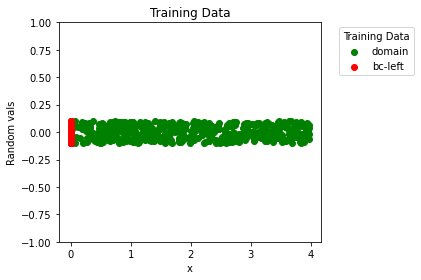

In [72]:
dg.plot_data()
#ploteo mis puntos _collocation points_ que tienen muchos puntos en el borde, al pedo, y  puntos en el intervalo [0,4]
#El scatter es solo para que se vea mejor, son todos puntos de R.

In [73]:
#defino mis funcion y mis variables
x = sn.Variable('x')

u = sn.Functional('u', [x], hidden_layers = 4*[10], activation = 'tanh', res_net=True) #esta es la red neuronal cruda sin entrenar,


In [74]:
#ahora defino la loss function para u

#Pido que satisfaga la ecuacion
L = sn.diff(u, x, order=1) + u * (sn.sub(u,1)) # sacando -1 de factor comun: Ux - u(1-u) = Ux + u (u-1)

#Dato inicial u(0) = 2
IC = (x==0.) * (sn.abs( sn.sub(u,2)))

In [75]:
modelo = sn.SciModel(x,[L,IC], optimizer = 'adam')


In [76]:
history = modelo.train(x_true = input_data, 
             y_true = target_data, 
             epochs = 100,
             learning_rate = 0.001,
             adaptive_weights={'method': 'NTK', 'freq':10, 'use_score':True})


Total samples: 1000 
Batch size: 64 
Total batches: 16 


+ NTK evaluation time [s]: 0.863396406173706 

+ adaptive_weights at epoch 1: [0.19721890645217302, 1.8027810935478268]
Epoch 1/100
16/16 [==============================] - 3s 11ms/step - batch: 7.5000 - size: 62.5000 - loss: 7.3301 - add_4_loss: 0.0217 - mul_117_loss: 4.0646 - lr: 0.0010 - time: 5.2941 - loss_weight_0: 0.1972 - loss_weight_1: 1.8028 - loss_gradient_0: 78.0929 - loss_gradient_1: 5.5602
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - batch: 7.5000 - size: 62.5000 - loss: 6.9470 - add_4_loss: 0.0107 - mul_117_loss: 3.8518 - lr: 0.0010 - time: 0.0777 - loss_weight_0: 0.1972 - loss_weight_1: 1.8028 - loss_gradient_0: 78.0929 - loss_gradient_1: 5.5602
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - batch: 7.5000 - size: 62.5000 - loss: 6.6008 - add_4_loss: 0.0082 - mul_117_loss: 3.6605 - lr: 0.0010 - time: 0.1387 - loss_weight_0: 0.1972 - loss_weight_1: 1.8028 - loss_gradient_0:

In [77]:
valores = np.arange(0,4,0.001)
valores_y = u.eval(valores)

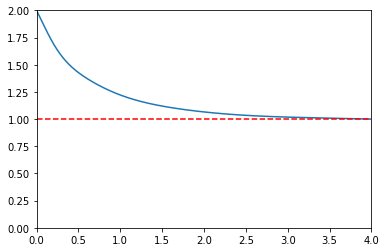

In [78]:
plt.plot(valores,valores_y)
plt.xlim([0,4])
plt.ylim([0,2])
plt.plot([0,4],[1,1],'--r')

$u_t = Lap (u) + u(1-u/k)$

u(x,t) = proporcion de gente en x a tiempo t